### CLASSIFYING THE PRICE OF MOBILE PHONES BY APPLYING ML MODELS WITH A MULTINOMIAL APPROACH USING PYTHON LANGUAGE

#### The key problem is to classify the mobile price range as compared to its feature selections.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
dataset = pd.read_csv("Mobile.csv")

In [3]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- Here we can see that all the data values are in numerical formate. 

In [5]:
#Summary of N/A Value
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- we have zero null values in the dataset.

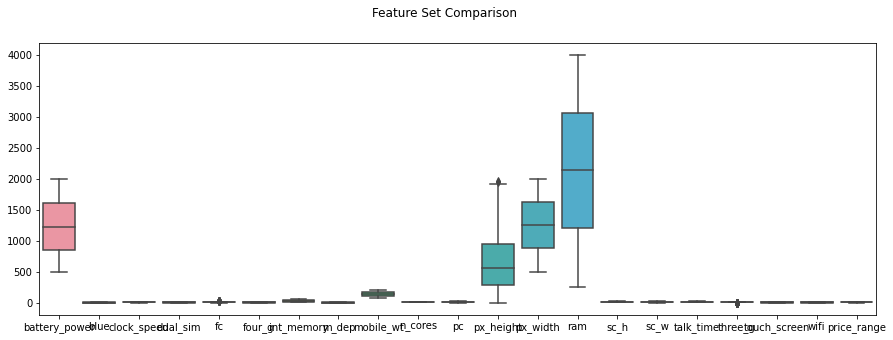

In [6]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

- Dataset dose not contain any outliers.

In [7]:
dataset['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

- In the dataset the dependent value "price_range" is divided into four categories. 
- all the categories have the same value counts. 

In [8]:
#Using Mapping
dataset['price_range'] = dataset['price_range'].map( {0:0, 1:0, 2:1, 3:1})
#dataset[['PMCno','DBH','Ht','Surv','Vig','Ins_res','Stem_Fm','Crown_Fm','Brnch_Fm', 'Utility_new']]

- converting muilty value into binomial values.

In [9]:
dataset['price_range'].value_counts()

1    1000
0    1000
Name: price_range, dtype: int64

In [10]:
import warnings
warnings.filterwarnings('ignore')

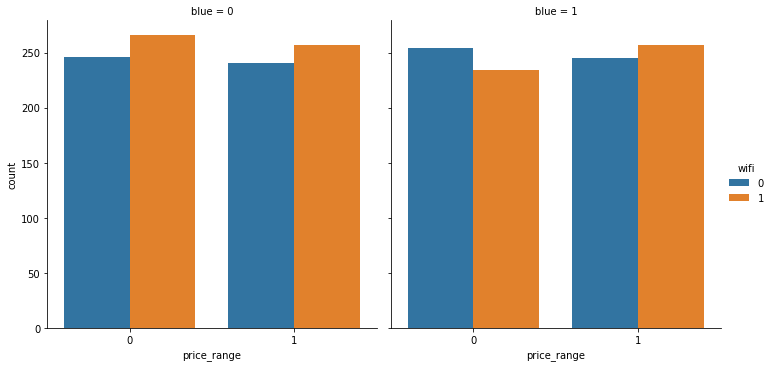

In [11]:
sns.catplot('price_range', col='blue',hue = 'wifi',data = dataset,  kind = 'count', col_wrap=2)

- bluetooth and wifi dose not have any effect on the mobile price. 

<AxesSubplot:xlabel='price_range', ylabel='count'>

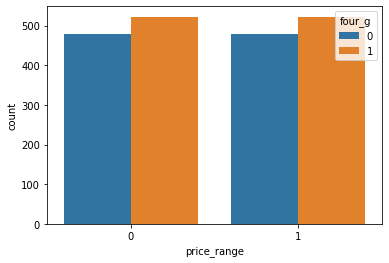

In [12]:
sns.countplot(dataset['price_range'],hue=dataset['four_g'])

- both the categories have 4G. 
- That means 4G dose not have significant effect on the price. 

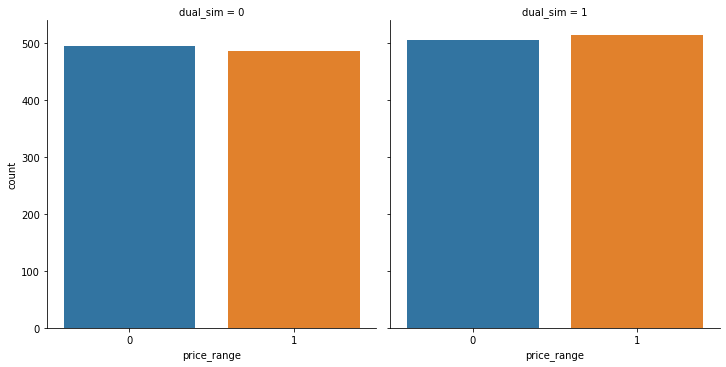

In [13]:
sns.catplot('price_range', col='dual_sim',data = dataset,  kind = 'count')

- dual sim have a very low effect on the price. 

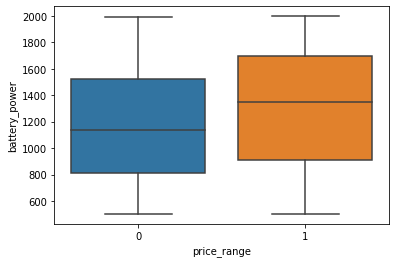

In [14]:
sns.boxplot(dataset['price_range'],dataset['battery_power']);
plt.show()

- We can see that mobile's battery effects the price of the mobile.

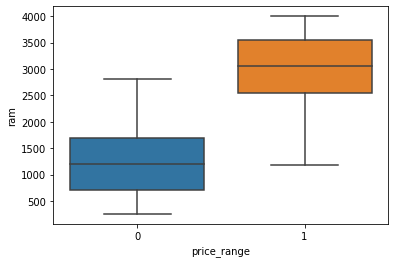

In [15]:
sns.boxplot(dataset['price_range'],dataset['ram']);
plt.show()

- Ram have a very huge effect on the price. 
- Higher ram increases the price of the phone. 

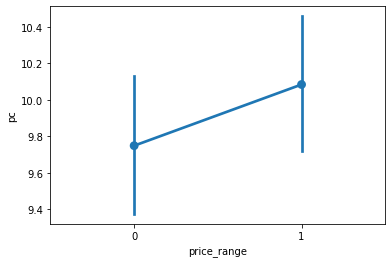

In [16]:
sns.pointplot(dataset['price_range'],dataset['pc']);

- Pc have a effect on the mobile's price. 

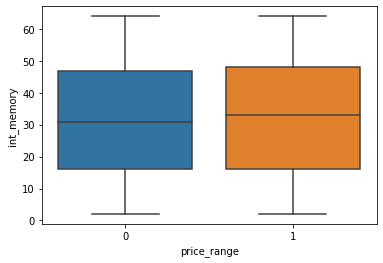

In [17]:
sns.boxplot(dataset['price_range'],dataset['int_memory']);

- internal memory dose not have much effect on the price.

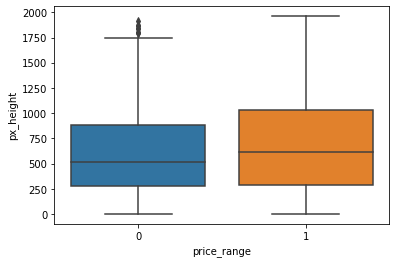

In [18]:
sns.boxplot(dataset['price_range'],dataset['px_height']);

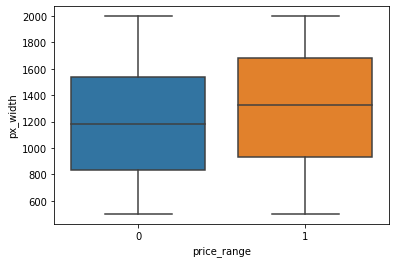

In [21]:
sns.boxplot(dataset['price_range'],dataset['px_width']);

- Px width and Px height have same effect on the price range. 

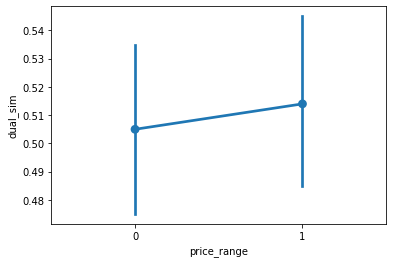

In [22]:
sns.pointplot(dataset['price_range'],dataset['dual_sim']);

- dual sim has a good impact on the price range 

<AxesSubplot:xlabel='fc'>

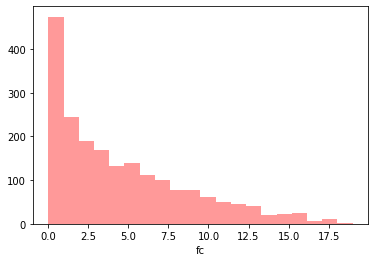

In [23]:
sns.distplot(dataset['fc'], color='red', kde=False)

- most of the fc values are from 0.0 to 5.0. 

<AxesSubplot:xlabel='sc_w'>

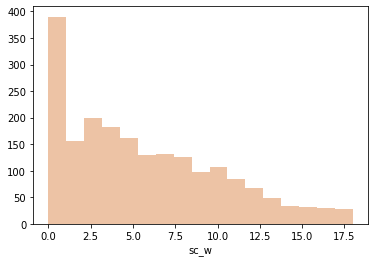

In [24]:
sns.distplot(dataset['sc_w'],color='chocolate', kde=False)

- Most of the phones gave sc_w values from 0.0 to 7.5. 

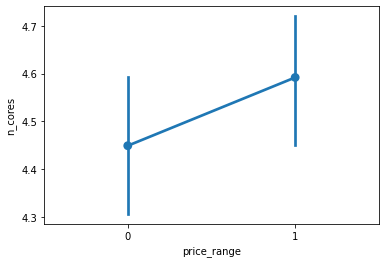

In [25]:
sns.pointplot(dataset['price_range'],dataset['n_cores']);

- n cores has the impact on the phone price. 

<AxesSubplot:xlabel='talk_time'>

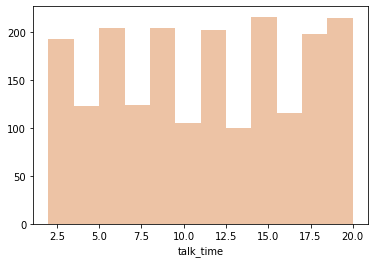

In [26]:
sns.distplot(dataset['talk_time'],color='chocolate', kde=False)

- there is no particular pattern in the talk time. 

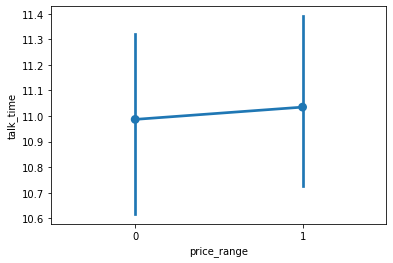

In [27]:
sns.pointplot(dataset['price_range'],dataset['talk_time']);

- talk time have very minor effect on the price range. 

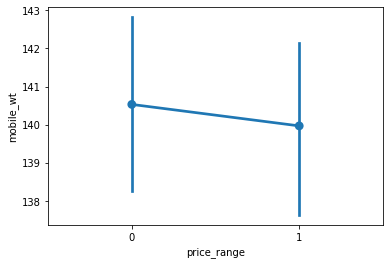

In [28]:
sns.pointplot(dataset['price_range'],dataset['mobile_wt']);

- we can see that when the phone phone width increases, the phone price decreses. 

<AxesSubplot:xlabel='clock_speed'>

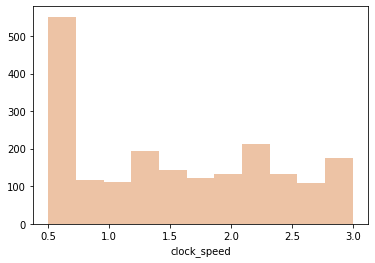

In [29]:
sns.distplot(dataset['clock_speed'],color='chocolate', kde=False)

- Most of the phone have clock speed around 0.5. 

<AxesSubplot:>

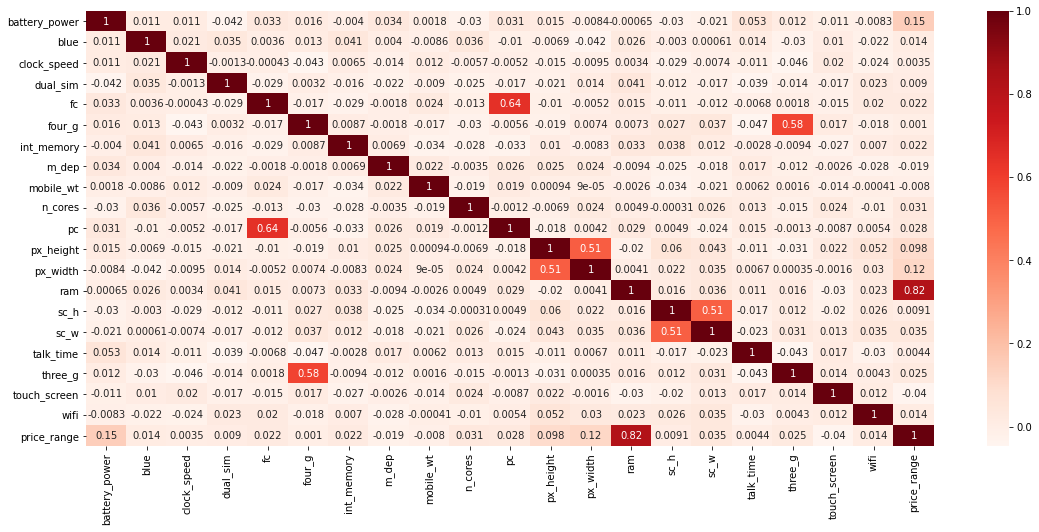

In [30]:
#Visualization of Correlations
fig = plt.figure(figsize=(19,8))
sns.heatmap(dataset.corr(),annot=True,cmap="Reds")

- heat map shows the relationship between independent variables. 
- here we can see that px_width & px_height and sc_w & sc_h are very highly related. 

In [31]:
#### Independent And Dependent features
X=dataset.drop('price_range',axis=1)
y=dataset['price_range']

In [32]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[175  12]
 [ 17 196]]
0.9275
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       187
           1       0.94      0.92      0.93       213

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



- Here we can see that the accuracy of the model is ~0.93. 
- TN = 175, TP = 196, FP = 12, FN = 17


In [37]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[175  12]
 [ 17 196]]
0.9275
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       187
           1       0.94      0.92      0.93       213

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



- Here we Manually added some Hyperparameters for better tuning. 
- But there is not much effect on the matrix. 


### Future work

- For future work we will apply Random search CV and Grid search cv for better perfomance. 
- will try to see what happen to the matrix if we apply PCA method. 